In [1]:
# Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
# !pip install joblib

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import seed
seed(1)

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [6]:
df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

# Select your features (columns)

In [7]:
# selected_features = ['koi_period', 'koi_time0bk', 'koi_impact', 
#                         'koi_duration', 'koi_depth', 'koi_prad', 
#                         'koi_teq', 'koi_insol', 'koi_model_snr',
#                         'koi_tce_plnt_num', 'koi_steff', 'koi_slogg',
#                         'koi_srad', 'ra', 'dec', 'koi_kepmag']

# Reduced selected features based on Random Forest Classifier in model_1.ipynb
selected_features = ['koi_model_snr', 'koi_impact', 'koi_prad']

In [8]:
X = df[selected_features]
X.shape

(6991, 3)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [9]:
# y = df['koi_disposition']

# Transform data into binary encoded data
data = df['koi_disposition'].copy()
data_binary = pd.get_dummies(data, columns=["koi_disposition"]) 

# y = data_binary['CONFIRMED']
y = data_binary['CONFIRMED'].values.reshape(-1, 1)
y.shape

(6991, 1)

In [10]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.head()

,koi_model_snr,koi_impact,koi_prad
1389,30.1,1.258,29.33
2874,43.3,1.263,23.81
4915,15.7,0.017,2.35
4172,100.3,0.966,3.98
161,1011.6,0.001,12.04


In [11]:
# # Create the model using LinearRegression
# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

In [12]:
# # Fit (Train) our model to the data
# model.fit(X_train, y_train)
# training_score = model.score(X_train, y_train)
# testing_score = model.score(X_test, y_test)

# print(f"Training Score: {training_score}")
# print(f"Testing Score: {testing_score}")

In [13]:
# predictions = model.predict(X)
# # Plot Residuals
# plt.scatter(predictions, predictions - y)
# plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
# plt.show()

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [15]:
# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Train the Model



In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# Create a LinearRegression model and fit it to the scaled training data
# Make predictions using the X_test_scaled data
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

linear.fit(X_train_scaled, y_train_scaled)

predictions = linear.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = linear.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

print(f"Training Data Score: {linear.score(X_train, y_train)}")
print(f"Testing Data Score: {linear.score(X_test, y_test)}")

MSE: 0.9800858956255379, R2: 0.01979199149198818
Training Data Score: -120407.43424648874
Testing Data Score: -240784.43408877702


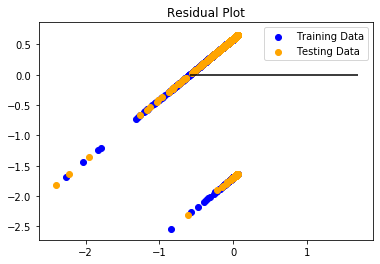

In [18]:
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

plt.scatter(linear.predict(X_train_scaled), linear.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(linear.predict(X_test_scaled), linear.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [19]:
# # LASSO model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Lasso
# lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)
# predictions = lasso.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = lasso.score(X_test_scaled, y_test_scaled)
# print(f"MSE: {MSE}, R2: {r2}")

# print(f"Training Data Score: {lasso.score(X_train, y_train)}")
# print(f"Testing Data Score: {lasso.score(X_test, y_test)}")

In [20]:
# # Ridge model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import Ridge
# ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)
# predictions = ridge.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = ridge.score(X_test_scaled, y_test_scaled)
# print(f"MSE: {MSE}, R2: {r2}")

# print(f"Training Data Score: {ridge.score(X_train, y_train)}")
# print(f"Testing Data Score: {ridge.score(X_test, y_test)}")

In [21]:
# # ElasticNet model
# # Note: Use an alpha of .01 when creating the model for this activity
# from sklearn.linear_model import ElasticNet
# elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)
# predictions = elasticnet.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = elasticnet.score(X_test_scaled, y_test_scaled)
# print(f"MSE: {MSE}, R2: {r2}")

# print(f"Training Data Score: {elasticnet.score(X_train, y_train)}")
# print(f"Testing Data Score: {elasticnet.score(X_test, y_test)}")

In [22]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = classifier.score(X_test_scaled, y_test_scaled)
# print(f"MSE: {MSE}, R2: {r2}")
print(f"MSE: {MSE}")

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

MSE: 1.0009962659995084
Training Data Score: 0.742513827961091
Testing Data Score: 0.7419908466819222


In [23]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_

# We can sort the features by their importance
sorted(zip(importances, X), reverse=True)

Training Data Score: 0.742513827961091
Testing Data Score: 0.7419908466819222


[(0.38376922496338833, 'koi_model_snr'),
 (0.3318703289314938, 'koi_prad'),
 (0.2843604461051179, 'koi_impact')]

In [24]:
# # K Nearest Neighbors
# # Loop through different k values to see which has the highest accuracy
# # Note: We only use odd numbers because we don't want any ties
# from sklearn.neighbors import KNeighborsClassifier

# train_scores = []
# test_scores = []
# for k in range(1, 100, 4):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_scaled, y_train)
#     train_score = knn.score(X_train_scaled, y_train)
#     test_score = knn.score(X_test_scaled, y_test)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
#     print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
# plt.plot(range(1, 100, 4), train_scores, marker='o')
# plt.plot(range(1, 100, 4), test_scores, marker="x")
# plt.xlabel("k neighbors")
# plt.ylabel("Testing accuracy Score")
# plt.show()


k: 31, Train/Test Score: 0.822/0.815
k: 33, Train/Test Score: 0.822/0.814
k: 35, Train/Test Score: 0.822/0.815
k: 37, Train/Test Score: 0.821/0.817
k: 39, Train/Test Score: 0.820/0.815
k: 41, Train/Test Score: 0.820/0.814
k: 43, Train/Test Score: 0.818/0.821
k: 45, Train/Test Score: 0.819/0.819
k: 47, Train/Test Score: 0.818/0.820
k: 49, Train/Test Score: 0.819/0.819
k: 51, Train/Test Score: 0.820/0.818
k: 53, Train/Test Score: 0.819/0.817
k: 55, Train/Test Score: 0.820/0.818
k: 57, Train/Test Score: 0.819/0.818
k: 59, Train/Test Score: 0.821/0.819
k: 61, Train/Test Score: 0.819/0.817
k: 63, Train/Test Score: 0.819/0.817
k: 65, Train/Test Score: 0.817/0.817
k: 67, Train/Test Score: 0.817/0.818
k: 69, Train/Test Score: 0.816/0.819
k: 71, Train/Test Score: 0.817/0.818
k: 73, Train/Test Score: 0.815/0.817
k: 75, Train/Test Score: 0.814/0.817
k: 77, Train/Test Score: 0.815/0.818
k: 79, Train/Test Score: 0.814/0.817


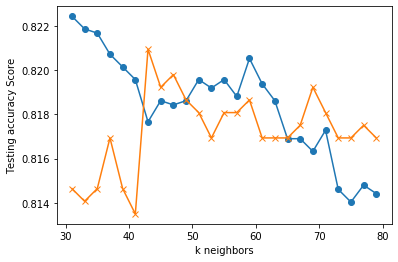

In [25]:
# K Nearest Neighbors
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(31, 80, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(31, 80, 2), train_scores, marker='o')
plt.plot(range(31, 80, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [26]:
# Note that k: 45 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train_scaled, y_train)
print(f'k=45 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=45 Test Acc: 0.819


In [27]:
# Get a random sample
from random import random
n = int(random()*(6991*.8) - 100)
n

4861

In [28]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
svc_linear = SVC(kernel='linear')

# fit random sample of training data
svc_linear.fit(X_train[n:n+100], y_train[n:n+100])

print('Test Acc: %.3f' % svc_linear.score(X_test, y_test))

Test Acc: 0.733


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [29]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_linear, param_grid, verbose=3)

grid.fit(X_train[n:n+45], y_train[n:n+45])

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.750, total=   0.2s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.786, total=  23.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.750, total=   0.1s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.733, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.786, total=  25.8s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.750, total=   0.4s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.733, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.786, total=  25.9s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  7.6min finished
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
print(grid.best_params_)
print(grid.best_score_)

# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["confirmed", "unconfirmed"]))

{'C': 1, 'gamma': 0.0001}
0.7555555555555555
              precision    recall  f1-score   support

   confirmed       0.74      1.00      0.85      1298
 unconfirmed       0.00      0.00      0.00       450

    accuracy                           0.74      1748
   macro avg       0.37      0.50      0.43      1748
weighted avg       0.55      0.74      0.63      1748



# Save the Model

In [31]:
# model.save("exoplanet_model.h5")

In [32]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'EllenHsu.sav'

# I chose KNN with k=45 based on the best Tesing Data Score of 0.819 
# using only the selected_features = ['koi_model_snr', 'koi_impact', 'koi_prad']
joblib.dump(knn, filename)


['EllenHsu.sav']